### Appending data

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
real_data = pd.read_csv('preprocessed_phone_usage_data.csv', encoding='utf-8')
synth_data = pd.read_csv('synthetic_phone_usage.csv', encoding='utf-8')

In [92]:
real_data['synthetic'] = 0
synth_data['synthetic'] = 1

In [93]:
combined_data = pd.concat([real_data, synth_data], ignore_index=True)

In [94]:
combined_data.head()

,age,gender,daily_phone_hours,check_screen_time,phone_usage_satisfaction,used_screen_time_app,check_phone_morning,scroll_before_bed,phone_affects_grades,mindless_scrolling,...,reread_due_to_distraction,gpa,has_job,App_Social,App_Texting,App_Videos,App_StudyOrWork,App_Gaming,App_Shopping,synthetic
0,0.1250,1,3,1,2,1,5,1,4,5,...,3,4.0,0.0,1,1,1,0,0,0,0
1,0.1250,1,3,1,1,1,5,1,3,5,...,3,4.0,0.0,1,1,1,1,0,0,0
2,0.1875,1,4,0,1,1,4,1,5,5,...,2,1.0,0.0,1,1,0,0,1,0,0
3,0.2500,1,2,1,4,1,3,1,4,3,...,3,2.0,1.0,1,1,1,0,0,0,0
4,0.2500,0,2,1,2,0,5,1,4,4,...,2,4.0,0.0,1,0,1,0,0,0,0


In [95]:
combined_data.shape

(1086, 22)

In [96]:
combined_data.to_csv('real+synth_phone_usage_data.csv', index=False)

In [97]:
df=combined_data.copy()

In [98]:
df.head()

,age,gender,daily_phone_hours,check_screen_time,phone_usage_satisfaction,used_screen_time_app,check_phone_morning,scroll_before_bed,phone_affects_grades,mindless_scrolling,...,reread_due_to_distraction,gpa,has_job,App_Social,App_Texting,App_Videos,App_StudyOrWork,App_Gaming,App_Shopping,synthetic
0,0.1250,1,3,1,2,1,5,1,4,5,...,3,4.0,0.0,1,1,1,0,0,0,0
1,0.1250,1,3,1,1,1,5,1,3,5,...,3,4.0,0.0,1,1,1,1,0,0,0
2,0.1875,1,4,0,1,1,4,1,5,5,...,2,1.0,0.0,1,1,0,0,1,0,0
3,0.2500,1,2,1,4,1,3,1,4,3,...,3,2.0,1.0,1,1,1,0,0,0,0
4,0.2500,0,2,1,2,0,5,1,4,4,...,2,4.0,0.0,1,0,1,0,0,0,0


In [99]:
df = pd.get_dummies(df, columns=['gender'])

In [100]:
df.rename(columns={'gender_0': 'gender_Female', 'gender_1': 'gender_Male'}, inplace=True)

In [101]:
df.head()

,age,daily_phone_hours,check_screen_time,phone_usage_satisfaction,used_screen_time_app,check_phone_morning,scroll_before_bed,phone_affects_grades,mindless_scrolling,short_video_time,...,has_job,App_Social,App_Texting,App_Videos,App_StudyOrWork,App_Gaming,App_Shopping,synthetic,gender_Female,gender_Male
0,0.1250,3,1,2,1,5,1,4,5,2,...,0.0,1,1,1,0,0,0,0,False,True
1,0.1250,3,1,1,1,5,1,3,5,3,...,0.0,1,1,1,1,0,0,0,False,True
2,0.1875,4,0,1,1,4,1,5,5,3,...,0.0,1,1,0,0,1,0,0,False,True
3,0.2500,2,1,4,1,3,1,4,3,2,...,1.0,1,1,1,0,0,0,0,False,True
4,0.2500,2,1,2,0,5,1,4,4,2,...,0.0,1,0,1,0,0,0,0,True,False


{'whiskers': [<matplotlib.lines.Line2D at 0x1f4cbe62c90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4cbe626c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4cbe62f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4cbe620f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4cbe61e20>],
 'means': []}

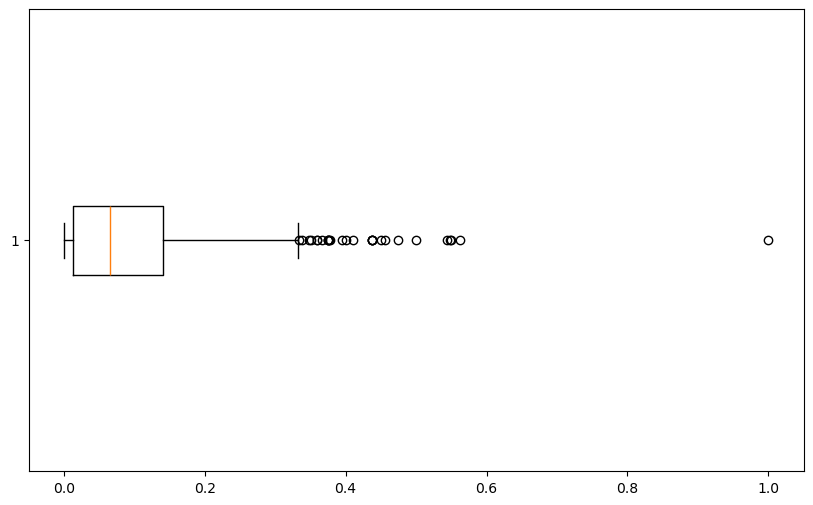

In [102]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['age'], vert=False)

In [105]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4cbf2e5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4cbf2eae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4cbf2e420>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4cbf2f050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4cbf2f2f0>],
 'means': []}

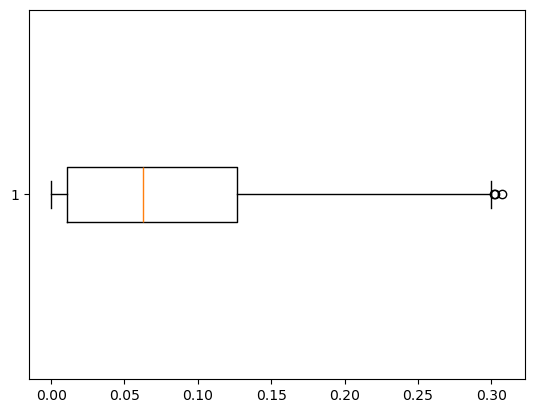

In [106]:
plt.boxplot(df['age'], vert=False)

In [107]:
df.shape

(1043, 23)

In [108]:
df.describe()

,age,daily_phone_hours,check_screen_time,phone_usage_satisfaction,used_screen_time_app,check_phone_morning,scroll_before_bed,phone_affects_grades,mindless_scrolling,short_video_time,...,reread_due_to_distraction,gpa,has_job,App_Social,App_Texting,App_Videos,App_StudyOrWork,App_Gaming,App_Shopping,synthetic
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,...,1043.000000,1043.00000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.082383,2.177373,0.551294,2.593480,0.409396,4.097795,0.906040,3.879195,3.870566,2.161074,...,2.315436,3.08629,0.206136,0.901246,0.534036,0.556088,0.293384,0.139022,0.066155,0.933845
std,0.078859,0.718675,0.497601,1.124511,0.491958,1.011463,0.291913,1.143612,1.075609,0.875635,...,0.729960,1.02943,0.404723,0.298474,0.499079,0.497083,0.455532,0.346136,0.248673,0.248673
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010750,2.000000,0.000000,2.000000,0.000000,4.000000,1.000000,3.000000,3.000000,2.000000,...,2.000000,3.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.062500,2.000000,1.000000,3.000000,0.000000,4.000000,1.000000,4.000000,4.000000,2.000000,...,2.000000,3.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.126650,3.000000,1.000000,3.000000,1.000000,5.000000,1.000000,5.000000,5.000000,3.000000,...,3.000000,4.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,0.307400,4.000000,1.000000,5.000000,1.000000,5.000000,1.000000,5.000000,5.000000,3.000000,...,3.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
